<a href="https://colab.research.google.com/github/ZohebAbai/mobile_sensing_robotics/blob/main/Iterative_Closest_Point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1 - ICP

In this exercise you will implement the ICP algorithm for a small 2D example dataset. 

## 1.1 ICP with given correspondences [5]

Implement ICP if the point correspondences are given. 
A starting point for this exercise is given as follows. 

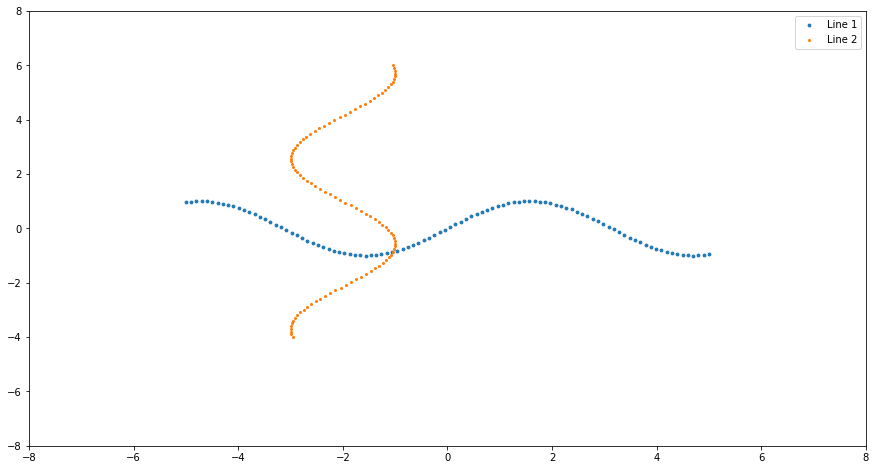

In [1]:
import ex4
import numpy as np
import matplotlib.pyplot as plt

Data = np.load('icp_data.npz')
Line1 = Data['LineGroundTruth'] # (2,100)
Line2 = Data['LineMovedCorresp'] # (2,100 )

# Show the initial positions of the lines
ex4.show_figure(Line1, Line2)

Following the missing parts in the algorithm, you will need to: 
  - compute mean point of an array of points in function **compute_mean()**;
  - compute cross covariance matrix **W** in **function compute_W()**;
  - compute estimated rotation and translation via **SVD** in function **compute_R_t()**;
  - apply the estimated rotation and translation and find the value of the squared error function to discover how good the estimated positions are in function **compute_error()**;
  - complete the fuction **icp_known_corresp()**.

Refer to the lecture slides for all the details. 

After you have implemented all the above, you should run the following code correctly and get the aligned Line1 and Line2.

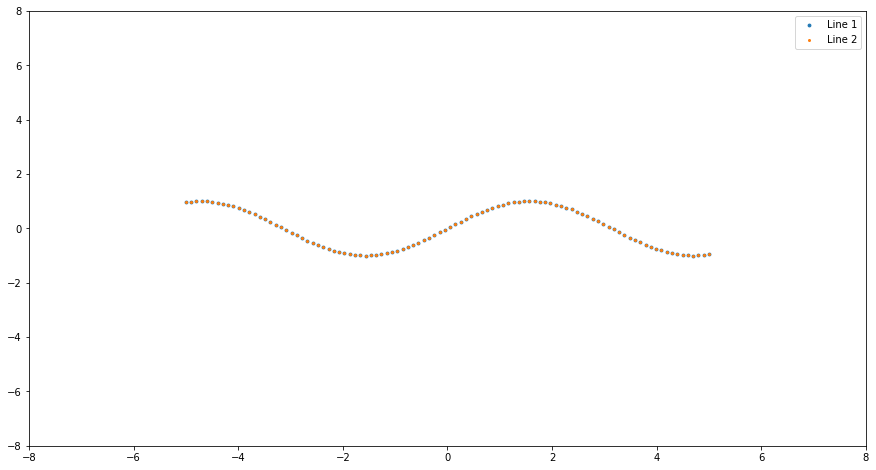

Error value is:  1.7802034921802035e-28


In [2]:
# We assume that the there are 1 to 1 correspondences for this data
QInd = np.arange(len(Line1[0]))
PInd = np.arange(len(Line2[0]))

# Perform icp given the correspondences
Line2, E = ex4.icp_known_corresp(Line1, Line2, QInd, PInd)

# Show the adjusted positions of the lines
ex4.show_figure(Line1, Line2)

# print the error
print('Error value is: ', E)

## 1.2 ICP without given correspondences [5]

Use the result of your code from the first question, to implement the full ICP algorithm.

When the point correspondences are not available. You will need to iteratively find the point correspondences and using these perform the ICP updates. 

A starting point for this exercise is given as follows.

Make you algorithm stop after convergence. 

**Hint:** The **NearestNeighbors** functions of **sklearn** library can be useful in this task.

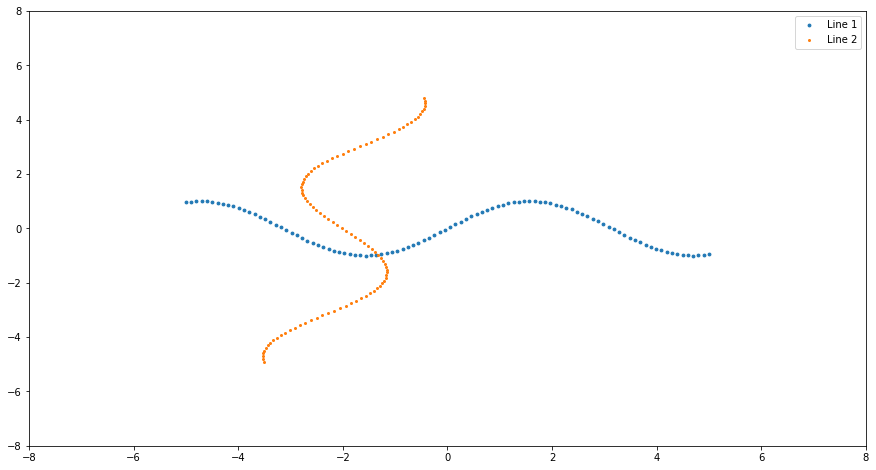

Error value on 0 iteration is:  637.4981780513156


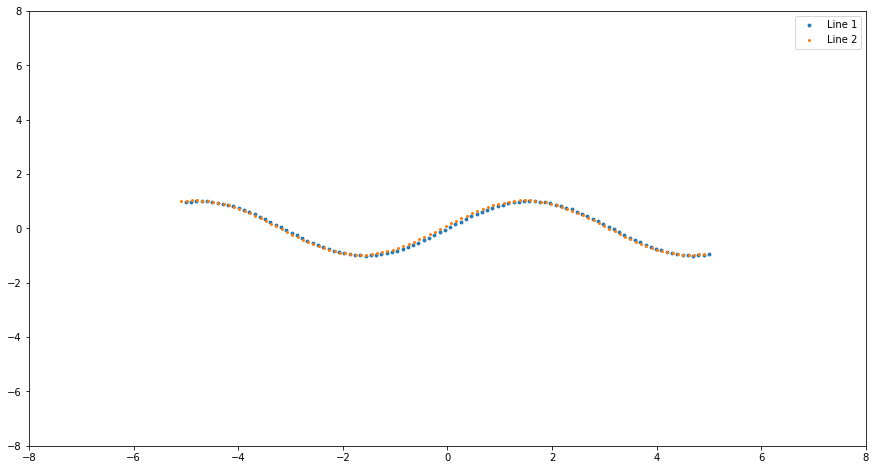

Error value on 10 iteration is:  0.386312755107354


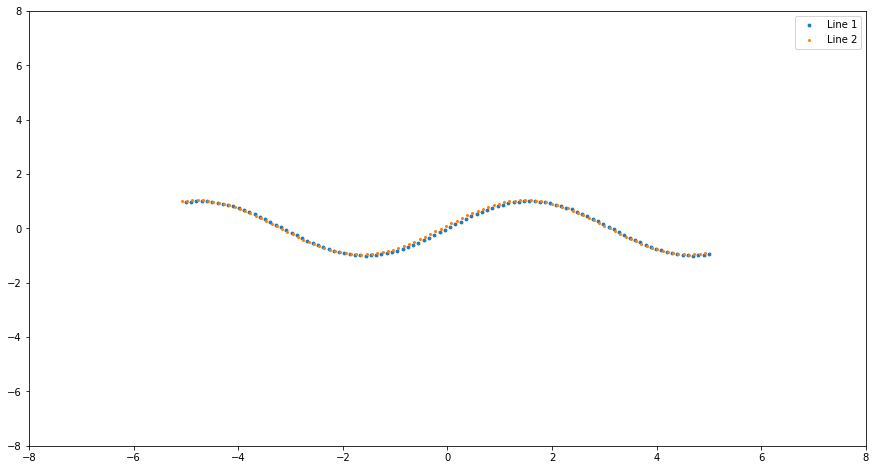

Error value on 20 iteration is:  0.36789607944774433


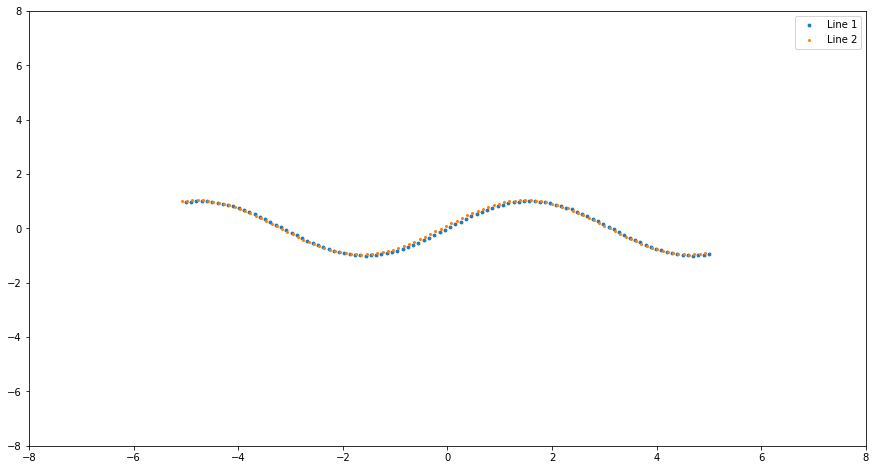

Error value on 30 iteration is:  0.36789607944774233


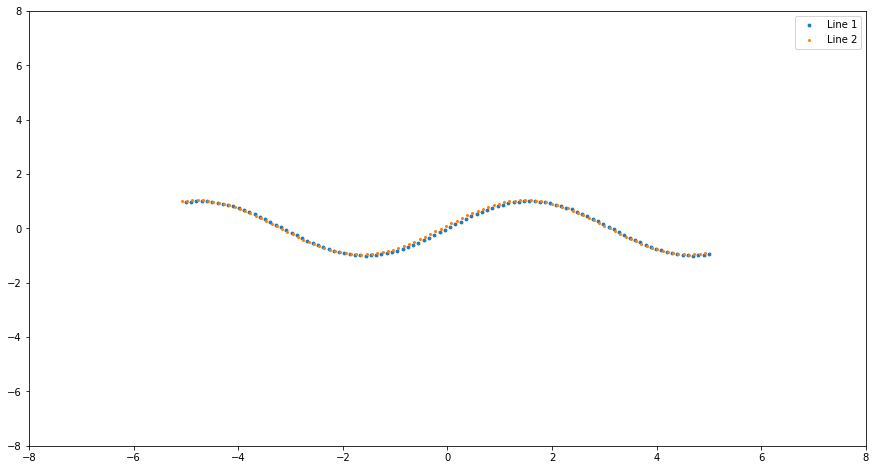

Error value on 40 iteration is:  0.367896079447741


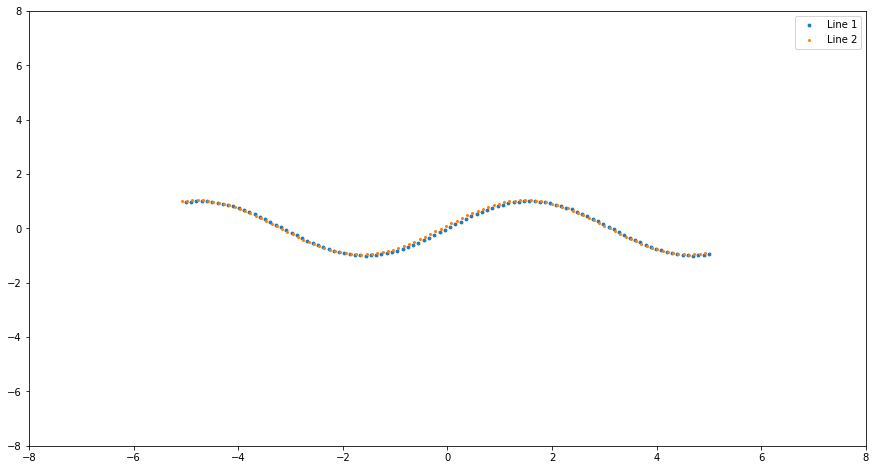

Error value on 50 iteration is:  0.36789607944773856


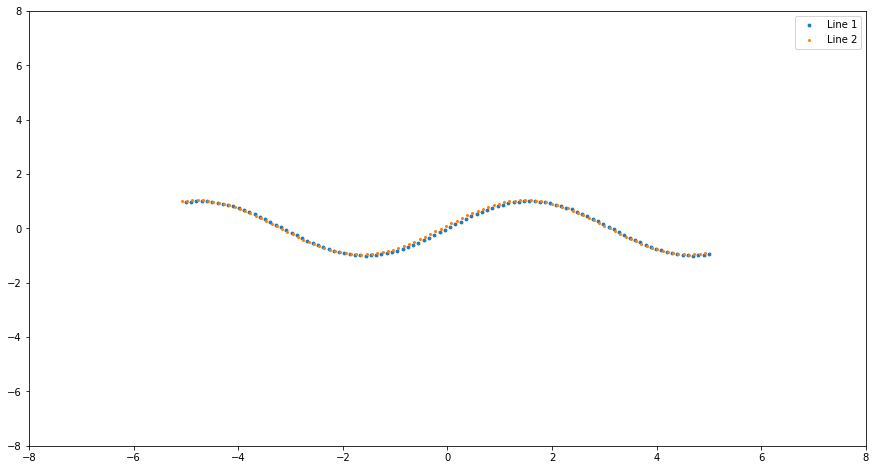

Error value on 60 iteration is:  0.3678960794477361


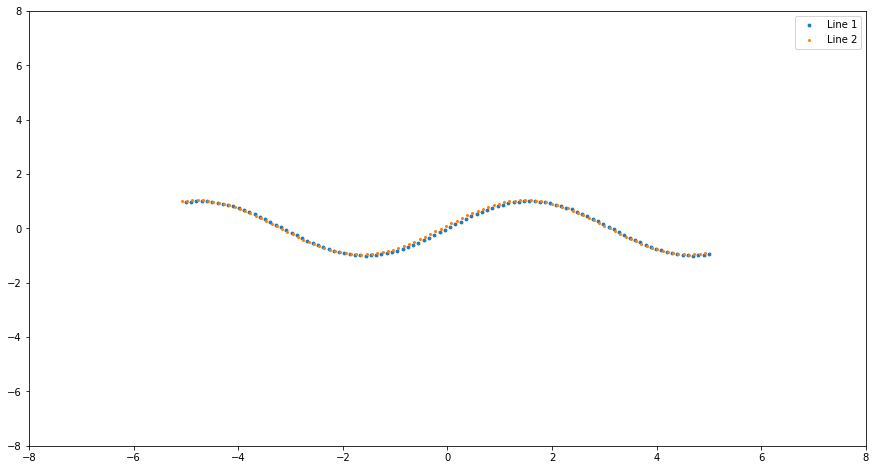

Error value on 70 iteration is:  0.3678960794477342


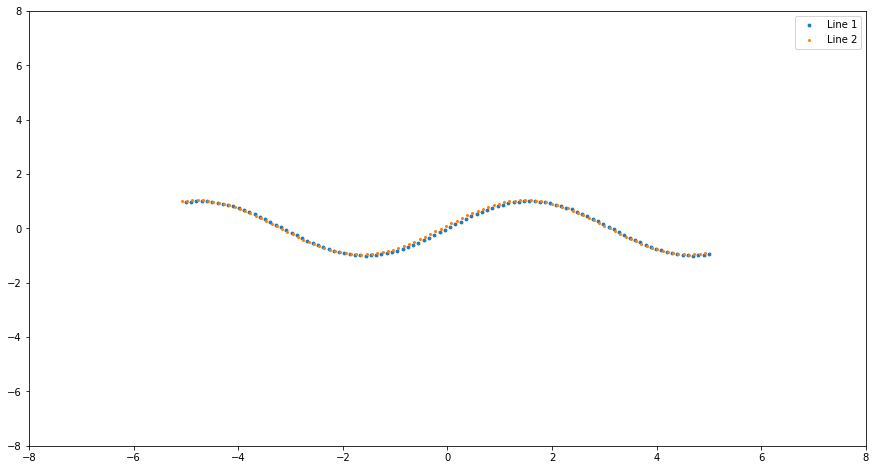

Error value on 80 iteration is:  0.3678960794477322


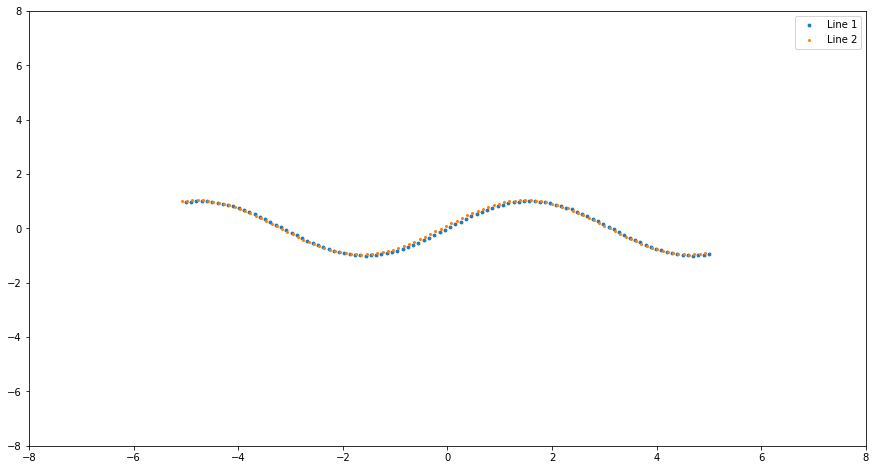

Error value on 90 iteration is:  0.36789607944773034


In [3]:
import ex4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Data = np.load('icp_data.npz')
Line1 = Data['LineGroundTruth']
Line2 = Data['LineMovedNoCorresp']

MaxIter = 100
Epsilon = 0.001
E = np.inf

# KNN for Line1
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(Line1.T)

for i in range(MaxIter):

    # point with index QInd(1, k) from Line1 corresponds to
    # point with index PInd(1, k) from Line2
    # Find correspondences using KNN
    QInd = np.array([i[0] for i in neigh.kneighbors(Line2.T, return_distance=False)]) 
    PInd = np.arange(Line2.shape[1])

    # update Line2 and error
    # Now that you know the correspondences, use your implementation
    # of icp with known correspondences and perform an update
    EOld = E
    Line2, E = ex4.icp_known_corresp(Line1, Line2, QInd, PInd)
    
    if i%10 == 0:
        ex4.show_figure(Line1, Line2)
        print('Error value on ' + str(i) + ' iteration is: ', E)

    if E < Epsilon:
        break;